##Investigate survival rate of the titanic passengers by age/sex/fareclass and other possible factors

Hypothesis: Females, young children and rich people (higher fare class) have higher survival rates. Factors such as point of embarkation do not matter as much in determining survival rates. 

Process:
    1. Import data 
    2. Convert data into a dataframe
    3. Clean data (fill or remove empty cells, standardize data types)
    4. Plot histogram of survival rate by sex/age/fareclass
    5. Plot a scatter plot of the correlation of different factors beyond sex/ age/ fareclass to understand which factor correlates with the highest survival rate

#import packages

In [48]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Let's import the data into a dataframe so we can do further statistical analysis 
1. Import data
2. Convert data into a dataframe

In [49]:
import unicodecsv

data = pd.read_csv('titanic-data.csv')


What is the size of the data set? 

In [50]:
data.shape

(891, 12)

12 columns and 891 rows. That is a managable size. 

What are the variables that we are dealing with ? 
Let's view the columns and a sample of the data set.  

In [51]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It looks like there are a few NaN values in the cabin class. It looks like high fares have cabins and low fares do not. We can run a correlation between these two variables after we change the NaN values to 0 at a later time. It is likely it is highly correlated, and we can just investigate the correlation of survival rates and fares (as a proxy to wealth)

The ticket values are not standardized either but it is not important for the analysis so we can ignore that.

I wonder if the numerical numbers are in floats/integers or strings. Let's investigate by figuring out the data types 

In [52]:
data.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

It looks like everything is in the right format . We do not need to convert strings to floats.

Now, let's take a deeper dive into the data. I will use data describe to understand the appx distribution and if there are any missing values.

In [53]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From this table we know that there were 891 passengers. 
The mean survival rate is 38%. 
The median passenger is in the lowest class (class 3). 
The mean age is ~30 years with a standard distribution of 15 years. It was a generally young crowd who were likely more able bodied. The oldest person was 80 years old. 
There were a few families on the ship - it seems like the largest family has 9 members (max siblingsp 8). I'm not entirely sure how this correlates with Parch but it is not relevant for this study . 

Seems like there are empty cells in age , replace empty cells with median age (so as not to skew the distribution)

In [54]:
data['Age'].fillna(data['Age'].median(), inplace=True)

4. Plot histogram of survival rate by sex/age/fareclass

Hypothesis: Females have a higher survival rate than men (ladies first on the boats)

Plot stacked bar chart of both genders in category survived vs did not survive 

We can see that more females survived than males by a large margin . 
The survival rate of females is greater than males. 

To view it a different way: Plot stacked bar chart of survived vs did not survive by gender
Print survival rate by gender

Percentage of female that survived: 74.0 %
Percentage of male that survived: 19.0 %


,female,male
Survived,233,109
Died,81,468


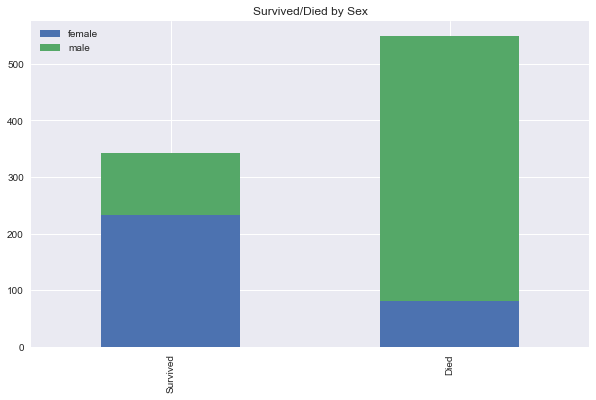

In [55]:
Survived = data[data.Survived == 1]['Sex'].value_counts()
Died = data[data.Survived == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([Survived , Died])
df_sex.index = ['Survived','Died']
df_sex.plot(kind='bar',stacked=True, figsize=(10,6), title="Survived/Died by Sex")


female_survived= df_sex.female[0]/df_sex.female.sum()*100
male_survived = df_sex.male[0]/df_sex.male.sum()*100
print("Percentage of female that survived:" ,round(female_survived), "%")
print("Percentage of male that survived:" ,round(male_survived), "%")

# display table
from IPython.display import display
display(df_sex) 

Here it is clear that females have a much higher survival rate (74%) than the mean (38%). Conversely, males have a much lower survival rate(19%). 

I wonder if the males who survived are younger or richer.

Plot histogram of survived vs did not survive by age

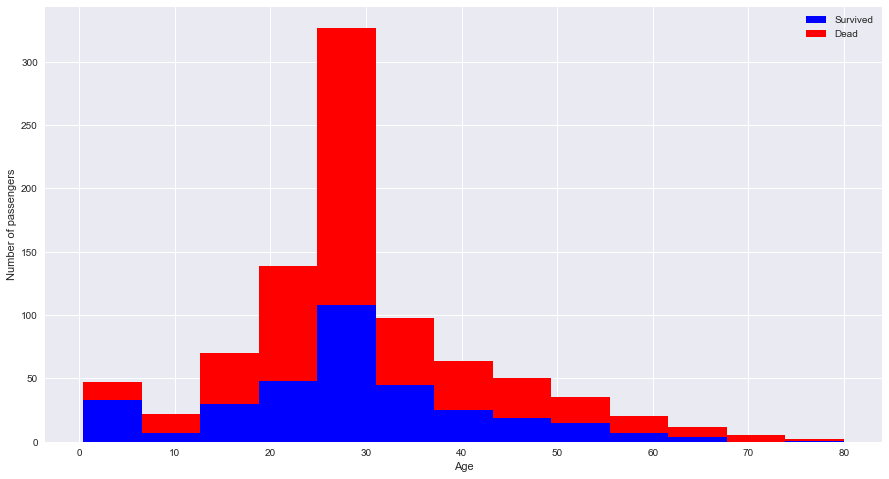

In [56]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']], stacked=True, color = ['b','r'],
         bins = 13,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

The spike at 29 is due to filling the NA values with the median age. We could have used a random distribution tool to distribute the NA values. It is not likely that there was a spike of people aged 29. However the survival rate looks similar to the other ages. 

You have the highest survival rate as an young child . Let's dive deeper by printing survival rates of each age segment in in bins of 5 years


In [57]:
#print survival rates by bins


Plot histogram of survived vs did not survive by fare class

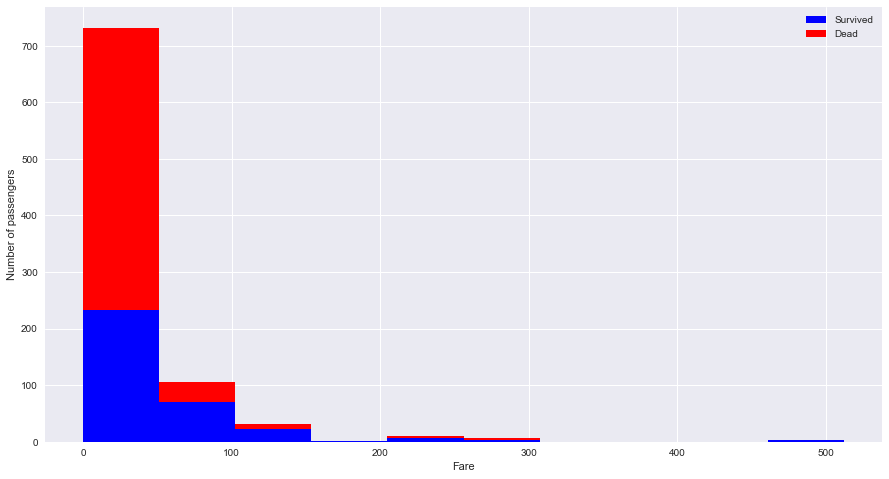

In [58]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']], stacked=True, color = ['b','r'],
         bins = 10,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()


It seems like passengers from the lowest fare class has the lowest survival rate


Now let's investigate survival rates with 2 variables : Fares and Age

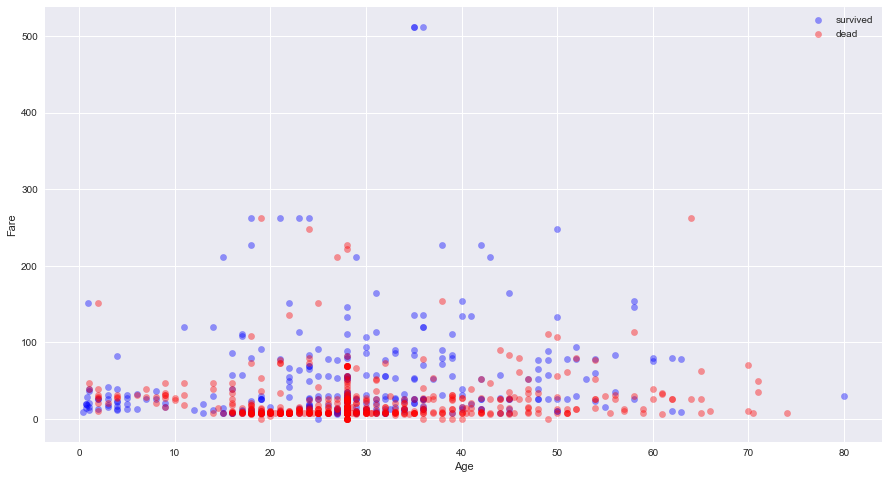

In [59]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='blue',s=40, alpha=0.4)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='red',s=40,  alpha=0.4)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1)


If you are richer, you generally have a much higher survival rate.
If you are an infant or any child under 5 then you have a higher survival rate 

Plot a scatter plot of the correlation of different factors beyond sex/ age/ fareclass to understand which factor correlates with the highest survival rate

In [60]:
from scipy import stats

#correlation = stats.pearsonr(x, y)
age_survival_correlation = stats.pearsonr(data['Survived'], data['Age'])

from scipy import stats
Correlation_age = stats.pearsonr(data['Age'], data['Survived'])
Correlation_fare = stats.pearsonr(data['Fare'], data['Survived'])
Correlation_sex = stats.pearsonr(data['Sex'], data['Survived'])
Correlation_class = stats.pearsonr(data['Pclass'], data['Survived'])
Correlation_embark = stats.pearsonr(data['Embarked'], data['Survived'])

co_table = pd.DataFrame([Correlation_age , Correlation_fare ,Correlation_sex,Correlation_class,Correlation_embark])
co_table.index = ['age' , 'fare' ,'sex', 'class','embark']

# display table
from IPython.display import display
display(co_table) 

#plot correlation on -1 to 1 y-axis? 


SyntaxError: invalid syntax (<ipython-input-60-58dc22ae41c4>, line 7)

Summary:
1. Of the 891 passengers of the boat, 342 survived. The survival rate is 38%. 
2. Females have a higher rate of survival at 74% and compared to males at 19%
3. Children (under 5) have a higher rate of survival.
4. Richer passengers who pay a higher fare also have a higher rate of survival. 


References
https://www.kaggle.com/sramml/simple-tutorial-for-beginners?scriptVersionId=1408653
http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html 
https://www.kaggle.com/shivendra91/rolling-in-the-deep